https://github.com/zjlszcy/CIFAR-10-CNN/blob/master/lib/Keras_CNN_Baseline.ipynb

https://jovianlin.io/saving-loading-keras-models/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf

In [0]:
ROOT = '/content/drive/My Drive/19 Fall/CSE 569/Project'

In [4]:
X_train = pickle.load(open(ROOT + '/cifar/X_train', mode='rb'))
print(X_train.shape)
X_test = pickle.load(open(ROOT + '/cifar/X_test', mode='rb'))
print(X_test.shape)
X_val = pickle.load(open(ROOT + '/cifar/X_val', mode='rb'))
print(X_val.shape)
y_train = pickle.load(open(ROOT + '/cifar/y_train', mode='rb'))
print(y_train.shape)
y_test = pickle.load(open(ROOT + '/cifar/y_test', mode='rb'))
print(y_test.shape)
y_val = pickle.load(open(ROOT + '/cifar/y_val', mode='rb'))
print(y_val.shape)

(32000, 32, 32, 3)
(10000, 32, 32, 3)
(8000, 32, 32, 3)
(32000, 10)
(10000, 10)
(8000, 10)


In [5]:

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.datasets import cifar10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


Using TensorFlow backend.


In [0]:
# Functions for plots
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

In [7]:
# Define the model
num_filters = 32

model = Sequential()
model.add(Conv2D(num_filters, (3,3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(2*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Summarize the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
fit_history = model.fit(X_train, y_train,
                       batch_size=128, epochs=100,
                       validation_data = (X_test, y_test),
                       verbose=1)
end = time.time()

# Training time
print("Model took %0.2f seconds to train"%(end - start))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         


In [0]:
model_path = ROOT + '/cifar/model'
model.save(model_path)

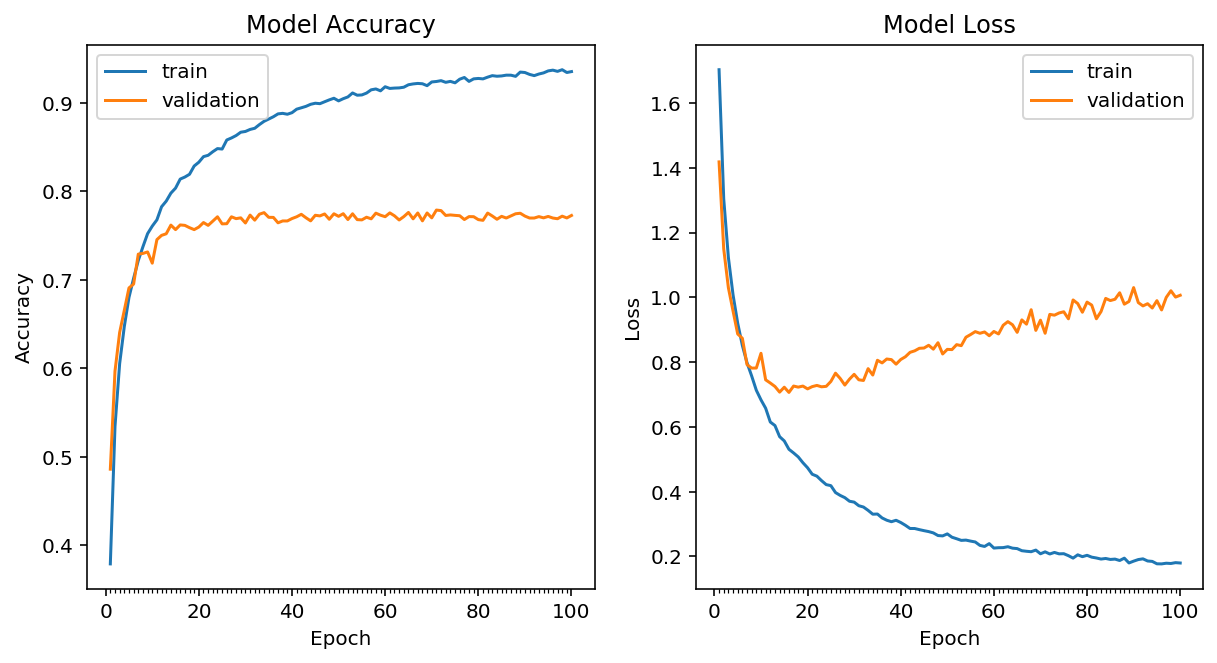

10000/10000 [==============================] - 12s 1ms/step

Test result: 77.290 loss: 1.006


In [9]:
plot_model_history(fit_history)

acc = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))

In [10]:
acc = model.evaluate(X_val, y_val, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))

8000/8000 [==============================] - 10s 1ms/step

Test result: 77.825 loss: 0.996


In [0]:
from keras.models import load_model
model = load_model(model_path)


Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
acc = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))


10000/10000 [==============================] - 12s 1ms/step

Test result: 77.300 loss: 1.018


In [0]:
acc = model.evaluate(X_val, y_val, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))


8000/8000 [==============================] - 9s 1ms/step

Test result: 77.737 loss: 1.014
